# 분류 모델 실습

## pima-indians-diabetes.csv 파일을 읽어서, 당뇨병을 분류하는 모델을 만드시오.

컬럼 정보 :

Preg=no. of pregnancy

Plas=Plasma

Pres=blood pressure

skin=skin thickness

test=insulin test

mass=body mass

pedi=diabetes pedigree function

age=age

class=target(diabetes of not, 1:diabetic, 0:not diabetic)

In [6]:
import pandas as pd

In [11]:
df = pd.read_csv('data/pima-indians-diabetes.csv')

In [12]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
df.isna().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [42]:
X = df.iloc[ : ,  : -2+1]

In [20]:
y = df['class']

In [40]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [43]:
X.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [46]:
df.loc[df['Pres'] == 0 , ].shape

(35, 9)

In [47]:
df.shape

(768, 9)

In [48]:
df.loc[df['skin'] == 0 , ].shape

(227, 9)

In [52]:
import numpy as np

In [54]:
X.loc[ : , 'Plas' : 'mass' ] = X.loc[ : , 'Plas' : 'mass' ].replace( 0, np.nan )
                                                        # nan 으로 바꾸기 @@

In [55]:
X.isna().sum()

Preg      0
Plas      5
Pres     35
skin    227
test    374
mass     11
pedi      0
age       0
dtype: int64

In [56]:
# 1. NaN을 없애는 전략
# 2. Nan을 다른 값으로 채우는 전략

In [57]:
# Nan을 각 컬럼의 평균으로 셋팅하세요

In [61]:
X

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47


In [ ]:
X = X.fillna( X.mean() )
# 이거 한줄로 각 컬럼에 평균으로 채울수 있음

In [78]:
X.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [82]:
X_scaled = scaler.fit_transform(X)

In [83]:
X_scaled

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [84]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [85]:
# 트레이닝셋과 테스트셋으로 나눈다.

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state= 22)

In [88]:
# 모델링

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
classifier = LogisticRegression()

In [92]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 컨퓨전 매트릭스로 검증

In [94]:
y_pred = classifier.predict(X_test)

In [96]:
y_test.values

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [97]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [104]:
cm = confusion_matrix(y_test, y_pred)

In [105]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [106]:
(92+22) / cm.sum()

0.7402597402597403

In [108]:
import seaborn as sb
import matplotlib as plt

<AxesSubplot:>

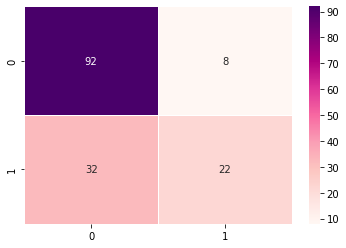

In [112]:
sb.heatmap(data= cm, annot=True, cmap = 'RdPu' ,linewidths= 0.5)

In [113]:
print(classification_report((y_test, y_pred)))

TypeError: classification_report() missing 1 required positional argument: 'y_pred'

In [64]:
X['Plas'].mean()

121.6867627785059

In [66]:
X['Plas'] = X['Plas'].fillna(X['Plas'].mean())

In [69]:
X.isna().sum()

Preg      0
Plas      0
Pres     35
skin    227
test    374
mass     11
pedi      0
age       0
dtype: int64

In [ ]:
X['Pres'] = X['Pres'].fillna(X['Pres'].mean())
X['skin'] = X['skin'].fillna(X['skin'].mean())
X['test'] = X['test'].fillna(X['test'].mean())
X['mass'] = X['mass'].fillna(X['mass'].mean())

In [74]:
X.columns[2 : 5+1]

Index(['Pres', 'skin', 'test', 'mass'], dtype='object')

In [75]:
for i in X.columns[2 : 5+1] :
    X[i] = X[i].fillna(X[i].mean())
    

In [76]:
X.isna().sum()

Preg    0
Plas    0
Pres    0
skin    0
test    0
mass    0
pedi    0
age     0
dtype: int64

In [77]:
X

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [26]:
X = scaler.fit_transform(X)

In [27]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [29]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 3)

In [31]:
X_train

array([[ 1.23388019, -0.02799627, -3.57259724, ..., -0.25289651,
        -0.87244072,  0.40494237],
       [ 1.23388019,  0.1597866 ,  0.25303625, ..., -0.77326542,
        -0.93586321,  0.49003012],
       [ 0.04601433,  0.72313521, -0.57412775, ..., -0.31635613,
        -0.55834837,  0.31985461],
       ...,
       [ 0.04601433, -0.96691063, -3.57259724, ..., -0.506735  ,
         0.41714996, -0.19067191],
       [-0.84488505, -0.30967058,  0.87340925, ..., -0.24020459,
        -0.99324546, -0.87137393],
       [ 0.63994726, -0.184482  , -0.47073225, ...,  0.2167047 ,
        -0.68519336,  0.57511787]])

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
classifier = LogisticRegression()

In [34]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = classifier.predict(X_test)

In [39]:
y_test.values

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [38]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)